<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/1003_non_supervised_from_few_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets.mnist import load_data

In [44]:
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [45]:
p = np.random.permutation(len(y_train))
x_train = x_train[p]
y_train = y_train[p]

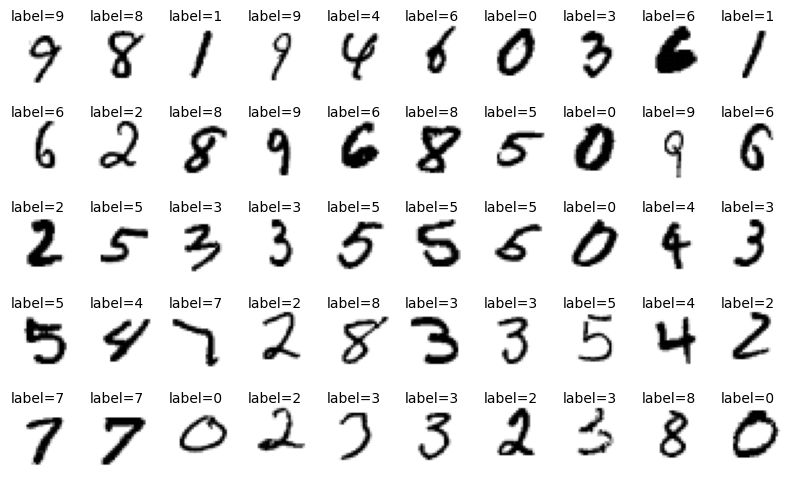

In [46]:
fig, axs = plt.subplots(5, 10, figsize=(10, 6))
for i in range(5):
    for j in range(10):
        idx = random.randint(0, 60000)
        axs[i, j].imshow(x_train[idx], cmap="gray_r")
        axs[i, j].axis("off")
        axs[i, j].text(0, 0, f"label={y_train[idx]}")
plt.show()

In [47]:
x_train = x_train / 255.0
x_test = x_test / 255.0

m, r, c = x_train.shape
x_train = x_train.reshape((m, r*c))

m, r, c = x_test.shape
x_test = x_test.reshape((m, r*c))

In [48]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [49]:
n = 100
x_train_mini = x_train[:n]
y_train_mini = y_train[:n]

In [51]:
ann = Sequential([
    Dense(10, input_dim=28*28, activation="relu"),
    Dense( 32, activation="relu"),
    Dense( 64, activation="relu"),
    Dense( 32, activation="relu"),
    Dense( 10, activation="softmax"),
])
ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                7850      
                                                                 
 dense_11 (Dense)            (None, 32)                352       
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 12,724
Trainable params: 12,724
Non-trainable params: 0
_________________________________________________________________


In [52]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
hist = ann.fit(x_train_mini, y_train_mini, epochs=100, batch_size=10, verbose=0)

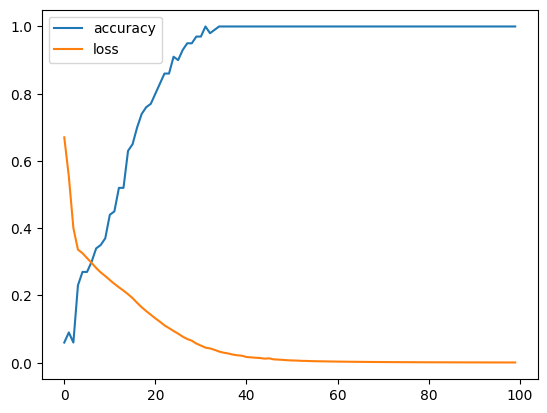

In [53]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.legend(["accuracy", "loss"])
plt.show()

In [54]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3463 - accuracy: 0.6466


[0.3463282883167267, 0.6466000080108643]

In [55]:
p = np.random.permutation(len(y_train))
x_train = x_train[p]
y_train = y_train[p]

In [56]:
m = len(x_train)

In [60]:
y_fake = ann.predict(x_train[:m//2])

938/938 [==============================] - 1s 1ms/step


In [67]:
ann = Sequential([
    Dense(10, input_dim=28*28, activation="relu"),
    Dense( 32, activation="relu"),
    Dense( 64, activation="relu"),
    Dense( 32, activation="relu"),
    Dense( 10, activation="softmax"),
])
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
hist = ann.fit(x_train[:m//2], y_fake, epochs=10, batch_size=10)

Epoch 1/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0910 - accuracy: 0.8323
Epoch 2/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0479 - accuracy: 0.9297
Epoch 3/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0443 - accuracy: 0.9412
Epoch 4/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0426 - accuracy: 0.9466
Epoch 5/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0414 - accuracy: 0.9501
Epoch 6/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0408 - accuracy: 0.9524
Epoch 7/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0400 - accuracy: 0.9533
Epoch 8/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0400 - accuracy: 0.9554
Epoch 9/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0393 - accuracy: 0.9566
Epoch 10/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.039

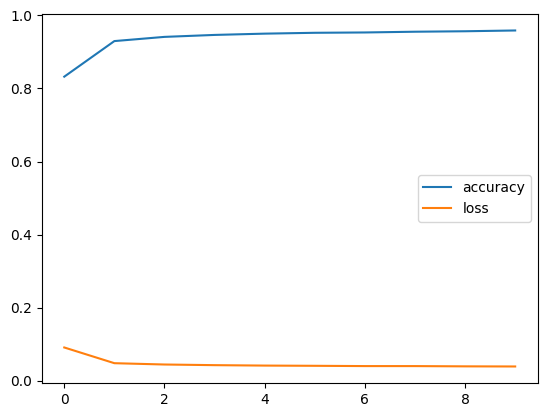

In [68]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.legend(["accuracy", "loss"])
plt.show()

In [69]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3484 - accuracy: 0.6453


[0.34841254353523254, 0.6452999711036682]

938/938 [==============================] - 2s 2ms/step
Epoch 1/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0924 - accuracy: 0.8188
Epoch 2/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0445 - accuracy: 0.9249
Epoch 3/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0392 - accuracy: 0.9347
Epoch 4/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0361 - accuracy: 0.9438
Epoch 5/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0350 - accuracy: 0.9465
Epoch 6/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0336 - accuracy: 0.9504
Epoch 7/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0323 - accuracy: 0.9526
Epoch 8/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0317 - accuracy: 0.9547
Epoch 9/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0312 - accuracy: 0.9560
Epoch 10/10
3000/3000 [===

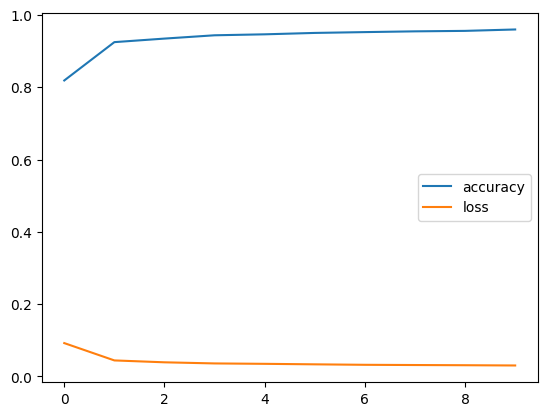

In [72]:

y_fake = ann.predict(x_train[m//2:])
ann = Sequential([
    Dense(10, input_dim=28*28, activation="relu"),
    Dense( 32, activation="relu"),
    Dense( 64, activation="relu"),
    Dense( 32, activation="relu"),
    Dense( 10, activation="softmax"),
])
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
hist = ann.fit(x_train[m//2:], y_fake, epochs=10, batch_size=10)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.legend(["accuracy", "loss"])
plt.show()

In [73]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4398 - accuracy: 0.6372


[0.4398203194141388, 0.6371999979019165]

In [74]:
ann.evaluate(x_train[:m//2], y_train[:m//2])

938/938 [==============================] - 2s 2ms/step - loss: 0.4430 - accuracy: 0.6420


[0.44299739599227905, 0.6419666409492493]